In [ ]:
!pip install kaggle

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the dependencies

In [ ]:
import os #library use to read the file
import json
from zipfile import ZipFile #for extract zip file
import pandas as pd
from sklearn.model_selection import train_test_split#split data into training and test
from tensorflow.keras.models import Sequential #for sequential layer
from tensorflow.keras.layers import Dense, Embedding, LSTM#for building neural network
from tensorflow.keras.preprocessing.text import Tokenizer#use to tokenize the data
from tensorflow.keras.preprocessing.sequence import pad_sequences#input data same shape

Data collection-Kaggle API

In [ ]:
kaggle_dictionary = json.load(open("kaggle.json"))

In [ ]:
kaggle_dictionary.keys()

In [ ]:
#setup kaggle credentials as environment variable
os.environ["KAGGLE_USERNAME"] = kaggle_dictionary["username"]
os.environ["KAGGLE_KEY"] = kaggle_dictionary["key"]

In [ ]:
df = pd.read_csv('/content/archive (5).zip')

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
df["sentiment"].value_counts()

,count
sentiment,
positive,25000
negative,25000


Text Preprocessing

In [ ]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>!""'), '', str(raw_text))
    return cleaned_text

In [ ]:
df['review'] = df['review'].apply(remove_tags)

In [ ]:
df['review'] = df['review'].apply(lambda x:x.lower())

In [ ]:
import nltk
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

In [ ]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love time money"" visually stu...",positive


/tmp/ipython-input-45-2595002800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')


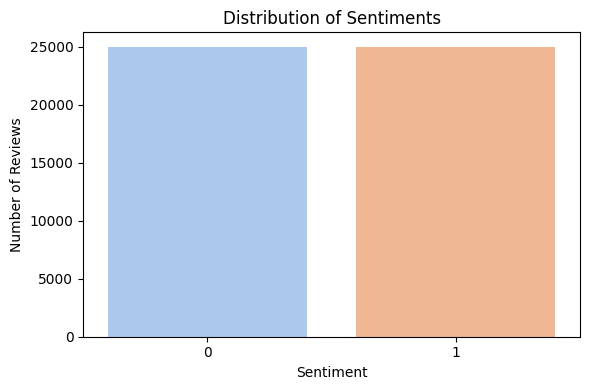

In [ ]:
sentiment_counts = df["sentiment"].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

In [ ]:
df.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

/tmp/ipython-input-43-1137712857.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


In [ ]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production. filming technique...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there's family little boy (jake) thi...,0
4,"petter mattei's ""love time money"" visually stu...",1


In [ ]:
df["sentiment"].value_counts()

,count
sentiment,
1,25000
0,25000


In [ ]:
#split data into training data and test data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
print(train_df.shape)
print(test_df.shape)

(40000, 2)
(10000, 2)


Data preprocessing

In [ ]:
#Tokenize text data
tokenizer = Tokenizer(num_words=5000)#most repeated works
tokenizer.fit_on_texts(train_df["review"])#fitting data to tokenizer
x_train = pad_sequences(tokenizer.texts_to_sequences(train_df["review"]), maxlen=200)#input shape constant
x_test = pad_sequences(tokenizer.texts_to_sequences(test_df["review"]), maxlen=200)#onvert5000wordsintoint

In [ ]:
print(x_train)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]


In [ ]:
print(x_test)

[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [ ]:
y_train = train_df["sentiment"]
y_test = test_df["sentiment"]

In [ ]:
print(y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


In [ ]:
print(y_test)

33553    1
9427     1
199      0
12447    1
39489    0
        ..
28567    0
25079    1
18707    1
15200    0
5857     1
Name: sentiment, Length: 10000, dtype: int64


Building the LSTM-Long Short Term Memory model type of RNN use of sequence dataset

In [ ]:
from tensorflow.keras.layers import Input # Import Input layer
#build the model embedding layer, LSTM layer, Dense layer and convert 128 dim vector space
model = Sequential([
    Input(shape=(200,)), # Explicitly define input shape
    Embedding(input_dim=5000, output_dim=128), # Removed input_length and input_shape
    LSTM(128, dropout=0.2, recurrent_dropout=0.2), #drop-sure model is not overfitting,generalize model
    Dense(1, activation="sigmoid")#neoron in previous layer connected to Dense layer,output neo.
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compile the model
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

Training the Model

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 525s 520ms/step - accuracy: 0.7303 - loss: 0.5286 - val_accuracy: 0.8245 - val_loss: 0.4095
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 537s 496ms/step - accuracy: 0.8512 - loss: 0.3537 - val_accuracy: 0.8755 - val_loss: 0.3030
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 495s 495ms/step - accuracy: 0.8838 - loss: 0.2825 - val_accuracy: 0.8775 - val_loss: 0.2983
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 496s 496ms/step - accuracy: 0.9102 - loss: 0.2330 - val_accuracy: 0.8791 - val_loss: 0.2981
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 523s 516ms/step - accuracy: 0.9235 - loss: 0.1993 - val_accuracy: 0.8810 - val_loss: 0.2964


Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 83ms/step - accuracy: 0.8848 - loss: 0.2793
Test Loss: 0.2799670994281769
Test Accuracy: 0.8863000273704529


Building a Prediction System

In [ ]:
def predict_sentiment(review):
  #tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative" #predict prob.of logistic regression
  return sentiment

Test Ptediction

In [ ]:
#example usage
new_review = "This movie was fantastic. I loved it."
sentiment = predict_sentiment(new_review)
print((f"The sentiment of the review is: {sentiment}"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
The sentiment of the review is: positive


In [ ]:
#example usage
new_review = "This movie was not that good."
sentiment = predict_sentiment(new_review)
print((f"The sentiment of the review is: {sentiment}"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
The sentiment of the review is: negative


In [ ]:
#example usage
new_review = "This movie whatever i have seen is somehting to be good but i like all charachter."
sentiment = predict_sentiment(new_review)
print((f"The sentiment of the review is: {sentiment}"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
The sentiment of the review is: positive


In [ ]:
#example usage
new_review = "This movie whatever i have seen is somehting to be good but i like few charachter."
sentiment = predict_sentiment(new_review)
print((f"The sentiment of the review is: {sentiment}"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
The sentiment of the review is: negative


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True